## Kolmogorov - Smirnov Test

### Do two distributions differ?

* Board explanation of K-S test.


In [5]:
import numpy as np

np.random.seed(12345)
N = 1000
mean1 = .5
mean2 = .53
a1 = mean1 + np.random.randn(N)
a2 = mean2 + np.random.randn(N)

Let's plot a histogram

Populating the interactive namespace from numpy and matplotlib


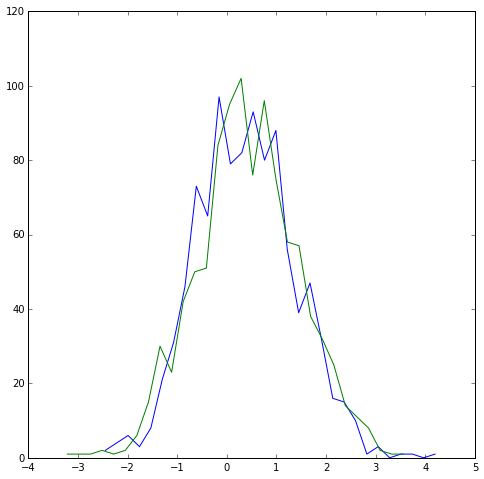

In [6]:
import matplotlib.pyplot as plt
%pylab inline
figure(figsize = (8,8))

h1, bins1 = np.histogram(a1, bins = 30)
h2, bins2 = np.histogram(a2, bins = 30)

clf()
plot(bins1[:-1], h1, label = 'a1')
plot(bins2[:-1], h2, label = 'a2')




In [7]:
from scipy import stats
stats.ks_2samp(a1, a2)

(0.04500000000000004, 0.25751117551495134)


We can reject the null hypothesis with a small p-value

In [ ]:
def functionalForm(x, a = 2., b = 3., c = 4., d = 2., e = 3.):
    return a * sin(np.pi * x) + b * sin(2 * np.pi * x) + c * cos(np.pi * x) + d * cos(2 * np.pi * x) + e

In [ ]:
nPoints = 80

xs = linspace(0,4 * np.pi, nPoints)
rms = 1
errors = rms * np.ones(nPoints)
myData = functionalForm(xs) + rms * np.random.randn(nPoints)

In [ ]:
errorbar(xs, myData, rms * ones(nPoints), fmt = 'o')


In [ ]:
def residual(avec, x, y, errors):
    '''This is what the chi-square routine will minimize -- x and y are datapoints; avec is the vector of 
parameter values.  Errors is a list of error bars.'''
    return (y - functionalForm(x, avec[0], avec[1], avec[2], avec[3], avec[4])) / errors

In [ ]:


avec = [1, 1, 1, 1, 1]

from scipy import optimize
afit, flag = optimize.leastsq(residual, avec, args = (xs, myData, errors))


In [ ]:
afit


In [ ]:
aflag

In [ ]:

clf()
errorbar(xs, myData, rms * ones(nPoints), fmt = 'o')
plot(xs, functionalForm(xs, afit[0], afit[1], afit[2], afit[3], afit[4]))
